# **Machine Learning Tutorial - TensorFlow**

This Jupyter Notebook files is a simple tutorial for Python users on the BSU Borah cluster. We will focus on PyTorch in this tutorial.

## **Scenario 1: Starting a new project.**

If you are starting a new project, it is better to create a new Python environment and install all the packages needed in it. Follow the steps in the link below to create a new Python environment on Borah.

[Click here](https://bsu-docs.readthedocs.io/en/latest/software/conda/)
    
For simplicity I will show the steps here, assuming that you will not need to use GPUs and already have conda/mamba installed. Ideally, if you know all the packages you will be using in your project, then it is better to install all of them at the point of creating your Python environment. This helps to prevent conflicts between package versions and dependencies. Here, we will create a new Python environment calle `ml_tutorial` that has some of the most popular and widely used Machine Learning (ML) Python packages installed in it. In this environment we need the following packages:
- pandas
- numpy
- matplotlib
- ipykernel
- pytorch (Note: Torch (built on Lua, a scripting language) and and PyTorch (built on Python) differ in origin. Also, the community and support for torch is diminishing, so it recommended to install PyTorch instead of torch. However, in Python, torch is the main package name for PyTorch. When you install PyTorch, you import it using `import torch`, not `import pytorch`.
- torchvision
- tensorflow
- tensorflow-gpu (for those who have need for GPUs)
- tensorboard
- scikit-learn

Notice, how there are no white spaces in my environment name. This is very important. You can change the environment.

Also note, per the new tensorflow update, once you install tensorflow you don't necessary have to install tensorbaord separately. However, for the purpose of this tutorial, I will just go ahead to install the two of them separately.
     
Run the following commands:

### **Step 1: Create a Python environment**

``` ruby
mamba create -n ml_tutorial -c conda-forge matplotlib numpy pandas ipykernel pytorch torchvision tensorflow tensorflow-gpu tensorboard scikit-learn
```

By extension, if you have up to `n` packages, then the code will be:

```ruby
mamba create -n climate -c conda-forge package1 package2 package3 ... packagen
```

### **Step 2: Add your environment to Borah `OnDemand`**

``` ruby
python -m ipykernel install --user --name ml_tutorial --display-name "ml_tutorial"
```

## **Scenario 2: Installing in an already existing Python environment**
If you already have and existing Python environment for your project, but wants to install additional Python libraries for your ML applications, then just simply skip creating a new Python environment. Just be aware that sometimes, you might have conflicts with some package versions and dependencies, this is normal and can be fixed. Though, sometimes the conflicts are not so easily fixed.

```ruby
mamba install -c conda-forge package1 package2 package3 ... packagen
```

Thus, by extension, if we only want to install the ML libraries in our existing Python environment, we will use the following command.

```ruby
mamba install -c conda-forge pytorch torchvision tensorflow tensorflow-gpu tensorboard scikit-learn
```

Great!!! 
Now the rest of this notebook demonstrates how to do a simple analysis using PyTorch.

## **ML Tutorial**
Here we will rely on some in-built datasets in Python to build very simple ML models. Note that the idea here is to demonstrate simply how to install and use this libraries on Borah. We don't care so much about the model's accuracy or performance.

### **The MNIST Problem: Handwritten Digit Classification**  

### **Overview**  
The **MNIST (Modified National Institute of Standards and Technology) dataset** is a classic **machine learning problem** where the goal is to classify **handwritten digits (0-9)**. The dataset consists of **70,000 grayscale images** of digits, each **28×28 pixels** in size.  

#### **Why is MNIST Important?**  
- It serves as the **"Hello World"** of deep learning and computer vision.
- It helps in testing **image classification algorithms**.
- It is small and easy to use but still challenging enough to evaluate different models.

---

### **Problem Definition**
The task is to train a **machine learning model** that can **automatically recognize handwritten digits** from images.

1. **Input:** A **grayscale image (28×28 pixels)** of a handwritten digit.
2. **Output:** A **single label (0-9)** representing the digit in the image.
3. **Model Type:** This is a **supervised classification** problem.

---

### **Dataset Breakdown**
- **Training Set:** 60,000 images.
- **Test Set:** 10,000 images.
- **Classes:** 10 (digits 0-9).
- **Image Properties:**
  - 28×28 pixels.
  - Each pixel has a value between **0 (black) and 255 (white)**.
  - No color channels (grayscale).
  - Images vary in style due to different handwriting.

---

### **Challenges of the MNIST Problem**
1. **Variability in Handwriting:** Different people write digits differently.
2. **Noise in Data:** Some images might be blurry or poorly written.
3. **Generalization:** The model should work on unseen handwritten digits.

---

### **Approaches to Solve MNIST**
There are several ways to tackle the problem:

| Approach | Method |
|----------|--------|
| **Basic Approach** | Logistic Regression, k-Nearest Neighbors (KNN) |
| **Deep Learning Approach** | Fully Connected Neural Networks (FCNN) |
| **Advanced Approach** | Convolutional Neural Networks (CNNs) |

---

### **Applications of MNIST Classification**
- Optical Character Recognition (**OCR**) in postal services.
- Digit recognition for **bank check processing**.
- Handwriting analysis in **touchscreen devices**.

### **Tutorial 1: PyTorch Machine Learning Tutorial**
**Objective: Train an ML model using PyTorch to classify images in the MNIST dataset (handwritten digits from 0 to 9).**

Note that this Jupyter Notebook is the PyTorch version of the TensorFlow tutorial already provided.

### **Step 1: Import Required Libraries**

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

### **Step 2: Load the MNIST Dataset**
The MNIST dataset consists of 28×28 grayscale images of handwritten digits (0-9).
We'll use torchvision to load and preprocess the data.

In [2]:
# Define transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load training and test datasets
train_dataset = torchvision.datasets.MNIST(root='/bsuhome/tnde/scratch/ml_tutorials/data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='/bsuhome/tnde/scratch/ml_tutorials/data', train=False, transform=transform, download=True)

# Create data loaders for batching
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check dataset shape
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw/train-images-idx3-ubyte.gz to /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



102.8%


Extracting /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw/train-labels-idx1-ubyte.gz to /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



112.7%

Extracting /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /bsuhome/tnde/scratch/ml_tutorials/data/MNIST/raw

Training dataset size: 60000
Test dataset size: 10000


### **Step 3: Build a Neural Network Model**
We define a feedforward neural network with one hidden layer.

In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()  # Flatten 28x28 images into 1D array
        self.fc1 = nn.Linear(28*28, 128)  # Fully connected layer with 128 neurons
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(0.2)  # Dropout to reduce overfitting
        self.fc2 = nn.Linear(128, 10)  # Output layer with 10 classes (digits 0-9)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = NeuralNet()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### **Step 4: Train the Model**

In [4]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training complete!")

Epoch [1/10], Loss: 0.4327
Epoch [2/10], Loss: 0.2336
Epoch [3/10], Loss: 0.1881
Epoch [4/10], Loss: 0.1610
Epoch [5/10], Loss: 0.1486
Epoch [6/10], Loss: 0.1370
Epoch [7/10], Loss: 0.1290
Epoch [8/10], Loss: 0.1210
Epoch [9/10], Loss: 0.1191
Epoch [10/10], Loss: 0.1122
Training complete!


### **Step 5: Evaluate the Model**

In [5]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get the class with highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9724


### **Step 6: Make Predictions**

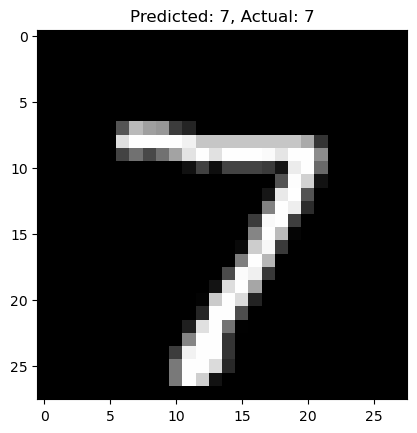

In [6]:
# Get a batch of test images
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Display an example image and prediction
plt.imshow(images[0].cpu().squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted[0].item()}, Actual: {labels[0].item()}")
plt.show()

### **Next Steps**
- Try using a Convolutional Neural Network (CNN) for better performance.
- Experiment with different optimizers and activation functions.
- Use a custom dataset (e.g., images of animals or handwritten characters).

## **PyTorch CNN Tutorial: Handwritten Digit Classification**
**Objective: Train a Convolutional Neural Network (CNN) using PyTorch to classify handwritten digits in the MNIST dataset.**

### **Step 1: Import Required Libraries**

In [1]:
# import torch
import numpy as np
# import torchvision
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import torchvision.transforms as transforms

### **Step 2: Load and Preprocess the MNIST Dataset**

In [2]:
# Define transformation (convert images to tensors and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

# Load training and test datasets
train_dataset = torchvision.datasets.MNIST(root='/bsuhome/tnde/scratch/ml_tutorials/data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='/bsuhome/tnde/scratch/ml_tutorials/data', train=False, transform=transform, download=True)

# Create data loaders for batching
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check dataset shape
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Training dataset size: 60000
Test dataset size: 10000


### **Step 3: Define the CNN Architecture**
Instead of a Dense Neural Network, we now use:

- Convolutional layers to extract features.
- MaxPooling layers to reduce dimensions.
- Dropout layers to prevent overfitting.

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 7x7 after pooling
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        self.fc2 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.relu3(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### **Step 4: Train the CNN Model**

In [4]:
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validate the model
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

print("Training complete!")

Epoch [1/10], Train Loss: 0.2486, Train Acc: 0.9239, Val Loss: 0.0526, Val Acc: 0.9839
Epoch [2/10], Train Loss: 0.0908, Train Acc: 0.9732, Val Loss: 0.0347, Val Acc: 0.9889
Epoch [3/10], Train Loss: 0.0669, Train Acc: 0.9801, Val Loss: 0.0296, Val Acc: 0.9905
Epoch [4/10], Train Loss: 0.0553, Train Acc: 0.9831, Val Loss: 0.0295, Val Acc: 0.9903
Epoch [5/10], Train Loss: 0.0472, Train Acc: 0.9855, Val Loss: 0.0251, Val Acc: 0.9927
Epoch [6/10], Train Loss: 0.0415, Train Acc: 0.9875, Val Loss: 0.0255, Val Acc: 0.9924
Epoch [7/10], Train Loss: 0.0354, Train Acc: 0.9890, Val Loss: 0.0221, Val Acc: 0.9933
Epoch [8/10], Train Loss: 0.0307, Train Acc: 0.9903, Val Loss: 0.0250, Val Acc: 0.9927
Epoch [9/10], Train Loss: 0.0297, Train Acc: 0.9905, Val Loss: 0.0237, Val Acc: 0.9932
Epoch [10/10], Train Loss: 0.0264, Train Acc: 0.9918, Val Loss: 0.0286, Val Acc: 0.9925
Training complete!


### **Step 5: Evaluate the Model**

In [5]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9925


### **Step 6: Visualize Training Progress**
Plot the accuracy and loss curves for both training and validation.

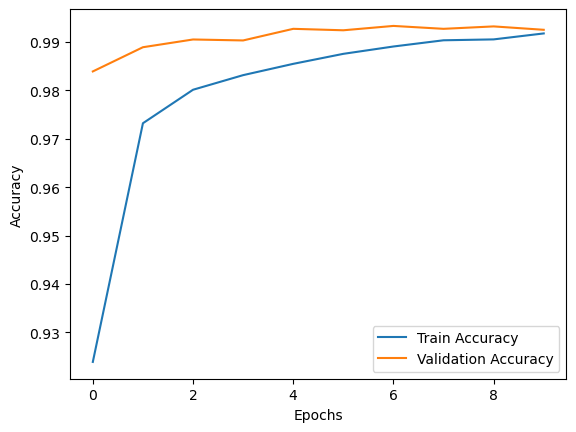

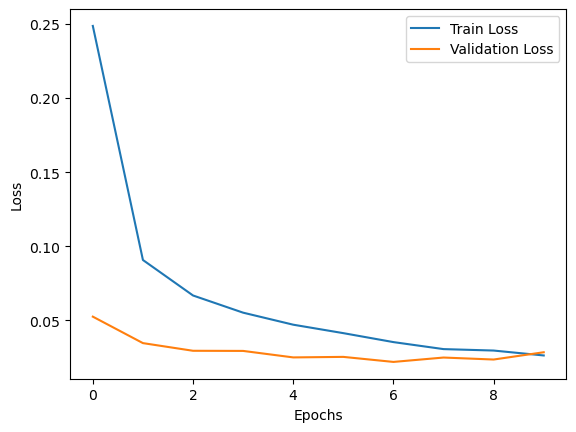

In [6]:
# Plot Accuracy
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Step 7: Make Predictions**

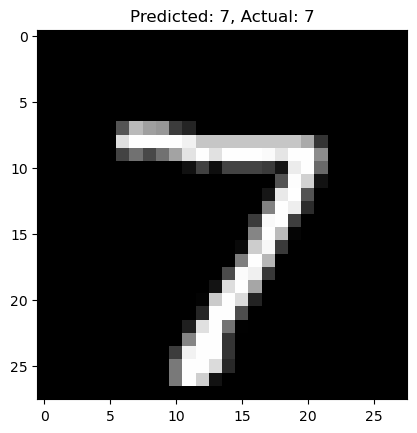

In [7]:
# Get a batch of test images
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Display an example image and prediction
plt.imshow(images[0].cpu().squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted[0].item()}, Actual: {labels[0].item()}")
plt.show()

### **Next Steps for More Complexity**
- Increase CNN Depth - Add more convolutional layers.
- Use Data Augmentation - Improve generalization with `torchvision.transforms.RandomRotation` and `RandomHorizontalFlip`.
- Apply Transfer Learning - Use a pre-trained model like ResNet or VGG16.
- Train on Custom Datasets - Try it with a dataset like CIFAR-10 or Fashion-MNIST.

## **Advanced TensorFlow Tutorial: CNN for Fashion Image Classification**

Note that the MNIST handwritten digits problem is a relatively simple and widely studied problem. Even with a simle model we can get a better model performance. Now, let’s make this tutorial more complex by incorporating TensorBoard for visualization and data augmentation for better generalization. We will build a Convolutional Neural Network (CNN) to classify images from the Fashion-MNIST dataset, which is more challenging than MNIST.

**Objective: Train a deep CNN on the Fashion-MNIST dataset, use TensorBoard for visualization, and apply data augmentation to improve generalization.**

### **The Fashion-MNIST Problem: Clothing Item Classification**  

#### **Overview**  
**Fashion-MNIST** is a machine learning dataset designed as a more challenging replacement for the original **MNIST handwritten digit dataset**. The goal is to classify images of **clothing items** into one of **10 categories** using machine learning or deep learning models.

#### **Why Fashion-MNIST?**  
- **More challenging** than MNIST because clothing items have more complex patterns.  
- **Same format as MNIST**, making it easy to experiment with advanced models like CNNs.  
- **Real-world relevance** in applications like **retail, e-commerce, and fashion industry AI**.

---

### **Problem Definition**
The task is to build a **supervised classification model** that can recognize different types of clothing items from grayscale images.

1. **Input:** A **28×28 grayscale image** of a clothing item.  
2. **Output:** A **single label (0-9)** corresponding to the clothing category.  
3. **Model Type:** **Supervised classification problem**.

---

### **Dataset Breakdown**
- **Training Set:** 60,000 images.  
- **Test Set:** 10,000 images.  
- **Classes (10 Categories):**  
  | Label | Class Name | Example |
  |--------|------------|---------|
  | 0 | T-shirt/top | 👕 |
  | 1 | Trouser | 👖 |
  | 2 | Pullover | 🧥 |
  | 3 | Dress | 👗 |
  | 4 | Coat | 🧥 |
  | 5 | Sandal | 🩴 |
  | 6 | Shirt | 👚 |
  | 7 | Sneaker | 👟 |
  | 8 | Bag | 👜 |
  | 9 | Ankle boot | 👢 |

---

### **Challenges of the Fashion-MNIST Problem**
1. **More Visual Complexity** – Unlike MNIST, fashion images have textures and patterns.  
2. **Class Similarity** – Some items (e.g., shirts and coats) look similar, making classification harder.  
3. **Generalization** – The model must recognize items despite variations in style and texture.

---

### **Approaches to Solve Fashion-MNIST**
| Approach | Method |
|----------|--------|
| **Basic Approach** | Logistic Regression, k-Nearest Neighbors (KNN) |
| **Deep Learning Approach** | Fully Connected Neural Networks (FCNN) |
| **Advanced Approach** | Convolutional Neural Networks (CNNs) |
| **State-of-the-Art** | Transfer Learning (using ResNet, EfficientNet, etc.) |

---

### **Applications of Fashion-MNIST Classification**
- **E-commerce AI** – Automatically tag and sort clothing items.  
- **Retail Analytics** – Identify fashion trends using image recognition.  
- **Virtual Try-On Systems** – Power fashion recommendation systems.  


### **Here we put all the code together.**

In [1]:
import torch
import datetime
import numpy as np
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

# import torch
# import torchvision
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# import torchvision.transforms as transforms

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation and normalization
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(28, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
train_dataset = torchvision.datasets.FashionMNIST(root='/bsuhome/tnde/scratch/ml_tutorials/data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='/bsuhome/tnde/scratch/ml_tutorials/data', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model, loss, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set up TensorBoard
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
writer = SummaryWriter(log_dir=log_dir)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = correct / total
    train_loss = running_loss / len(train_loader)
    
    # Log metrics
    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Accuracy/train', train_accuracy, epoch)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}")

# Evaluate model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")
writer.add_scalar('Accuracy/test', test_accuracy)
writer.close()

print("code complete")
# Launch TensorBoard with: tensorboard --logdir=logs/

Epoch [1/10], Loss: 0.6872, Accuracy: 0.7507
Epoch [2/10], Loss: 0.5213, Accuracy: 0.8094
Epoch [3/10], Loss: 0.4757, Accuracy: 0.8270
Epoch [4/10], Loss: 0.4407, Accuracy: 0.8368
Epoch [5/10], Loss: 0.4151, Accuracy: 0.8486
Epoch [6/10], Loss: 0.4024, Accuracy: 0.8554
Epoch [7/10], Loss: 0.3814, Accuracy: 0.8608
Epoch [8/10], Loss: 0.3742, Accuracy: 0.8668
Epoch [9/10], Loss: 0.3646, Accuracy: 0.8688
Epoch [10/10], Loss: 0.3574, Accuracy: 0.8722
Test Accuracy: 0.2931
code complete


### Note:
The test accuracy is very low, but this tutorial focuses more on the workflow rather than the model's performance. Our model is most likely overfitting. For improved model performance, one may tune the parameters or make the model complex. For parameter tuning, one way is to use grid search to find the opotimal parameters within a given parameter space.

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


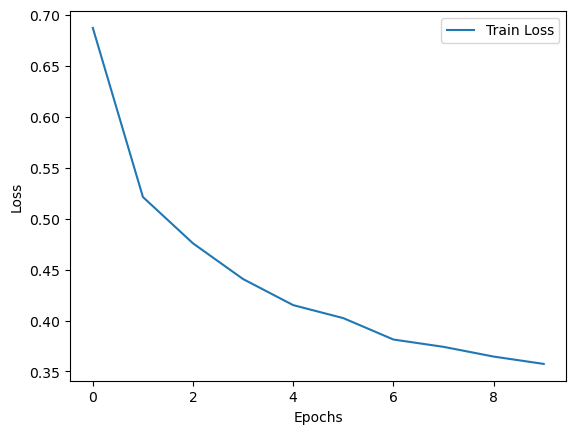

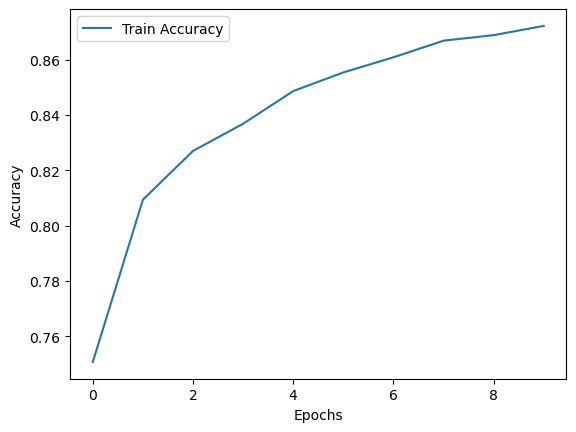

In [2]:
import os
import tensorflow as tf
event_files = [f for f in os.listdir(log_dir) if f.startswith("events")]

# Read scalar data from event files
train_losses = []
train_acc = []
for event_file in event_files:
    for e in tf.compat.v1.train.summary_iterator(os.path.join(log_dir, event_file)):
        for v in e.summary.value:
            if v.tag == 'Loss/train':  # NB: Adjust if your tag is different
                train_losses.append(v.simple_value)
            elif v.tag == 'Accuracy/train':  # NB: Adjust if your tag is different
                train_acc.append(v.simple_value)

# Plot the extracted values
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **TensorBoard**

TensorBoard allows you to monitor model training in real time.

### **What is TensorBoard?**  
TensorBoard is a **visualization tool** that comes with TensorFlow. It helps **monitor, debug, and optimize** machine learning models by providing interactive visualizations for:  

- **Training progress** (loss and accuracy curves)  
- **Model architecture** (graph visualization)  
- **Weight distributions** (to analyze parameter updates)  
- **Performance metrics** (scalars, histograms, images, etc.)  
- **Hyperparameter tuning** (using HParams)  

---
### **Why Use TensorBoard?**
1. **Track Model Training Progress**  
   - View loss and accuracy curves in real-time to detect overfitting or underfitting.  

2. **Visualize the Computation Graph**  
   - Understand the model structure and debug layer connections.  

3. **Analyze Weights and Biases**  
   - Track how model parameters evolve during training.  

4. **Compare Multiple Runs**  
   - Evaluate different hyperparameters and optimizers side by side.  

5. **Monitor Data Inputs and Outputs**  
   - Check how input data is transformed at different layers.  

---

### **TensorBoard Features**
| Feature | What It Does |
|---------|-------------|
| **Scalars** | Tracks metrics like loss & accuracy over time. |
| **Graphs** | Displays the model’s computational graph. |
| **Histograms** | Shows weight and bias distributions. |
| **Images** | Visualizes input images during training. |
| **HParams** | Helps tune hyperparameters like learning rate. |

---

### **Example TensorBoard Workflow**
If you are training a CNN on Fashion-MNIST, TensorBoard can help:  
- Monitor accuracy and loss curves.  
- Check if weights are updating properly.  
- Compare multiple optimizers (SGD, Adam, etc.).  


##### **Note: On Borah, you may not be able to use tensorboard if you do not have GPU access. One possible solution is to install `tensorflow-cpu` instead. It is the CPU-only version of TensorFlor. If you do have GPU access, make sure CUDA is available or properly loaded.**


### **Visualizing with TensorBoard: Run TensorBoard in Jupyter Notebook**

If you prefer running it inside Jupyter Notebook, you can use:

```ruby
%load_ext tensorboard
%tensorboard --logdir=runs
```

But this is not always reliable on remote clusters. Note that if your Jupyter Notebook is not in the folder containing `runs/`, you need to specify the correct path. For example, if `runs/` is inside `/home/user/project/`, but your notebook is in `/home/user/notebooks/`, then modify the command as follows:

```ruby
%load_ext tensorboard
%tensorboard --logdir=/home/user/project/runs
```

You can also move your notebook to the project/ folder to avoid path issues.


### **Visualizing with TensorBoard: Run TensorBoard in Terminal**
Start TensorBoard by running the following command in your terminal:

```ruby
tensorboard --logdir=runs
```

Then open your browser at http://localhost:6006/.


### Key Features of this Tutorial:
- Uses PyTorch's DataLoader for handling large datasets efficiently
- Implements a Convolutional Neural Network (CNN) for image classification
- Utilizes Dropout (0.5) to prevent overfitting
- Includes TensorBoard for logging training loss and accuracy
- Runs on GPU if available

## The End.